In [1]:
#importing the libraries

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\Sriharini\VIT\Semester6\ISM\Project\revisedDataset.csv')

In [3]:
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,0,udp,private,SF,105,146,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,1,0,udp,private,SF,105,146,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,2,0,udp,private,SF,105,146,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,3,0,udp,private,SF,105,146,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,4,0,udp,private,SF,105,146,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [5]:
df.shape

(311029, 43)

In [33]:
reduced_df = df.loc[:,["protocol_type","duration","service","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count","result"]]

In [34]:
icmp_df = reduced_df[reduced_df.loc[:,"protocol_type"] == "icmp"]

In [35]:
icmp_df.head()

,protocol_type,duration,service,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count,result
82,icmp,0,eco_i,30,0,2,0,0,2,normal.
156,icmp,0,ecr_i,30,0,2,0,0,2,normal.
406,icmp,0,ecr_i,30,0,2,0,0,2,normal.
629,icmp,0,ecr_i,30,0,1,0,0,1,normal.
767,icmp,0,eco_i,30,0,3,0,0,1,normal.


In [36]:
result_classes = icmp_df.result.unique()
result_classes

array(['normal.', 'smurf.', 'ipsweep.', 'saint.', 'pod.', 'multihop.',
       'satan.', 'snmpguess.'], dtype=object)

In [37]:
result = icmp_df.loc[:,"result"]

n = len(result_classes)
for i in range(n):
    if (result_classes[i] == 'normal.'):
        icmp_df = icmp_df.replace(result_classes[i], 0)
    else:
        icmp_df = icmp_df.replace(result_classes[i], 1)
    

In [38]:
icmp_df.head()

,protocol_type,duration,service,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count,result
82,icmp,0,eco_i,30,0,2,0,0,2,0
156,icmp,0,ecr_i,30,0,2,0,0,2,0
406,icmp,0,ecr_i,30,0,2,0,0,2,0
629,icmp,0,ecr_i,30,0,1,0,0,1,0
767,icmp,0,eco_i,30,0,3,0,0,1,0


In [39]:
icmp_df = icmp_df.replace("eco_i", -0.1)
icmp_df = icmp_df.replace("ecr_i", 0.0)
icmp_df = icmp_df.replace("tim_i", 0.1)
icmp_df = icmp_df.replace("urp_i", 0.2)

In [40]:
X = icmp_df.loc[:,["duration","service","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]]
Y = icmp_df.loc[:,"result"]


[]

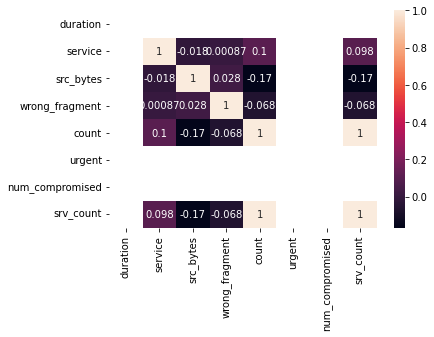

In [41]:
sns.heatmap(X.corr(), annot = True)
plt.plot()

In [42]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [44]:
models = [LogisticRegression(), 
          KNeighborsClassifier(n_neighbors=3), 
          MLPClassifier(alpha=0.005),
          DecisionTreeClassifier()]

classifiers = ["LR", "KNN", "MLP", "DecisionTree"]

scores = []

In [49]:
for model in models:
    print("Model Name: ",model, "\n")
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)*100
    scores.append(score)
    
    print("Accuracy of the Model: ", score)
    
    confMatrix = confusion_matrix(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred)
    
    print("Confusion Matrix:\n", confMatrix)
    print("Report:\n", report)
    print("\n===============****================")

Model Name:  LogisticRegression() 



C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of the Model:  99.93938291810632
Confusion Matrix:
 [[   82    24]
 [    6 49379]]
Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.85       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       0.97      0.89      0.92     49491
weighted avg       1.00      1.00      1.00     49491


===============****================
Model Name:  KNeighborsClassifier(n_neighbors=3) 

Accuracy of the Model:  99.99393829181064
Confusion Matrix:
 [[  104     2]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      0.99      0.99     49491
weighted avg       1.00      1.00      1.00     49491


===============****================
Model Name:  MLPCla

In [50]:
scores = scores[:4]
scores

[99.93938291810632, 99.93938291810632, 99.99393829181064, 99.74136711725365]

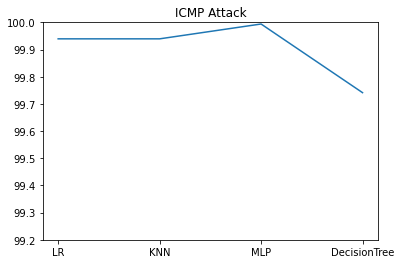

In [51]:
plt.plot(classifiers,scores)

plt.title("ICMP Attack")
plt.ylim(99.2,100)

plt.show()